this project are as follows:

Understand the data and identify key factors that influence loan approval, using these insights to create value for the company.
Develop a model to predict loan approval outcomes.
Build a software system that makes loan approval decisions using algorithms derived from the model.
In this part, I’ll provide an introduction and perform preliminary data cleaning to prepare for the analysis and insights discovery process. The dataset I’m using is sourced from  https://www.kaggle.com/datasets/arbaaztamboli/loan-approval-dataset/code , and it’s an excellent resource. Before diving in, I’ll explain the meaning of each feature in the dataset briefly. 

**Dataset Columns**:
Applicant_ID: Unique identifier for each loan application.

Gender: Gender of the applicant (Male/Female).

Age: Age of the applicant.

Marital_Status: Marital status of the applicant (Single/Married).

Dependents: Number of dependents the applicant has.

Education: Education level of the applicant (Graduate/Not Graduate).

Employment_Status: Employment status of the applicant (Employed, Self-Employed, Unemployed).

Occupation_Type: Type of occupation, which provides insights into the nature of the applicant’s job (Salaried, Business, Others).

Residential_Status: Type of residence (Owned, Rented, Mortgage).

City/Town: The city or town where the applicant resides.

Annual_Income: The total annual income of the applicant, a key factor in loan eligibility.

Monthly_Expenses: The monthly expenses of the applicant, indicating their financial obligations.

Credit_Score: The applicant's credit score, reflecting their creditworthiness.

Existing_Loans: Number of existing loans the applicant is servicing.

Total_Existing_Loan_Amount: The total amount of all existing loans the applicant has.

Outstanding_Debt: The remaining amount of debt yet to be paid by the applicant.

Loan_History: The applicant’s previous loan history (Good/Bad), indicating their repayment reliability.

Loan_Amount_Requested: The loan amount the applicant has applied for.

Loan_Term: The term of the loan in months.

Loan_Purpose: The purpose of the loan (e.g., Home, Car, Education, Personal, Business).

Interest_Rate: The interest rate applied to the loan.

Loan_Type: The type of loan (Secured/Unsecured).

Co-Applicant: Indicates if there is a co-applicant for the loan (Yes/No).

Bank_Account_History: Applicant’s banking history, showing past transactions and reliability.

Transaction_Frequency: The frequency of financial transactions in the applicant’s bank account (Low/Medium/High).

Default_Risk: The risk level of the applicant defaulting on the loan (Low/Medium/High).

Loan_Approval_Status: Final decision on the loan application (Approved/Rejected).


Let’s get started!

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For enhanced visualization

In [ ]:
# Load the dataset
df = pd.read_csv('loan_dataset.csv')  # Read the loan dataset from a CSV file
df.head()  # Display the first 5 rows of the dataset

,Applicant_ID,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,...,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


In [4]:
# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()

df.tail()  # Display the last 5 rows of the dataset

,applicant_id,gender,age,marital_status,dependents,education,employment_status,occupation_type,residential_status,city/town,...,loan_amount_requested,loan_term,loan_purpose,interest_rate,loan_type,co-applicant,bank_account_history,transaction_frequency,default_risk,loan_approval_status
51995,51996,Female,47,Divorced,1,High School,Self-Employed,Professional,Own,Urban,...,15723,60,Home,12.52,Secured,Yes,2,26,0.61,1
51996,51997,Male,25,Married,3,High School,Self-Employed,Freelancer,Rent,Urban,...,21209,237,Vehicle,5.21,Unsecured,No,8,26,0.04,1
51997,51998,Female,48,Married,0,High School,Unemployed,Business,Rent,Urban,...,10540,60,Education,10.60,Unsecured,No,8,24,0.31,0
51998,51999,Female,48,Divorced,1,High School,Employed,Business,Own,Urban,...,16765,32,Vehicle,8.11,Secured,Yes,3,12,0.34,0
51999,52000,Female,38,Single,2,High School,Self-Employed,Freelancer,Own,Urban,...,20454,93,Education,11.57,Unsecured,Yes,3,25,0.34,1


## Handling Missing Values 
I identified and handled missing values to improve the effectiveness of the analysis and ensure accurate data input for the model.

In [ ]:
# Check for missing values in each column
df.isnull().sum()

applicant_id                  0
gender                        0
age                           0
marital_status                0
dependents                    0
education                     0
employment_status             0
occupation_type               0
residential_status            0
city/town                     0
annual_income                 0
monthly_expenses              0
credit_score                  0
existing_loans                0
total_existing_loan_amount    0
outstanding_debt              0
loan_history                  0
loan_amount_requested         0
loan_term                     0
loan_purpose                  0
interest_rate                 0
loan_type                     0
co-applicant                  0
bank_account_history          0
transaction_frequency         0
default_risk                  0
loan_approval_status          0
dtype: int64

In [ ]:
# Display summary statistics for numerical columns
df.describe()

,applicant_id,age,dependents,annual_income,monthly_expenses,credit_score,existing_loans,total_existing_loan_amount,outstanding_debt,loan_history,loan_amount_requested,loan_term,interest_rate,bank_account_history,transaction_frequency,default_risk,loan_approval_status
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,26000.500000,38.898385,1.498000,83588.474404,2748.064885,678.089019,0.997865,24939.087962,14984.864923,0.198596,21102.765481,125.827019,9.253494,4.503923,17.031808,0.500204,0.641654
std,15011.251336,10.553928,1.118077,35720.851522,1295.678763,159.990367,0.815586,14407.886552,8663.404305,0.398947,8224.940906,65.509959,3.318356,2.872721,7.212011,0.289939,0.479519
min,1.000000,18.000000,0.000000,20009.000000,500.000000,300.000000,0.000000,0.000000,0.000000,0.000000,5000.000000,12.000000,3.500000,0.000000,5.000000,0.000000,0.000000
25%,13000.750000,31.000000,0.000000,55564.000000,1636.000000,553.000000,0.000000,12498.000000,7511.750000,0.000000,16941.750000,69.000000,6.400000,2.000000,11.000000,0.250000,0.000000
50%,26000.500000,38.000000,1.000000,78839.000000,2739.000000,742.000000,1.000000,24964.000000,14984.500000,0.000000,21039.000000,126.000000,9.240000,5.000000,17.000000,0.500000,1.000000
75%,39000.250000,45.000000,2.000000,114226.000000,3866.000000,796.000000,2.000000,37399.500000,22432.250000,0.000000,25809.000000,182.000000,12.140000,7.000000,23.000000,0.750000,1.000000
max,52000.000000,69.000000,3.000000,149998.000000,4999.000000,849.000000,2.000000,49999.000000,29998.000000,1.000000,44848.000000,239.000000,15.000000,9.000000,29.000000,1.000000,1.000000


## Outlier Detection and Removal

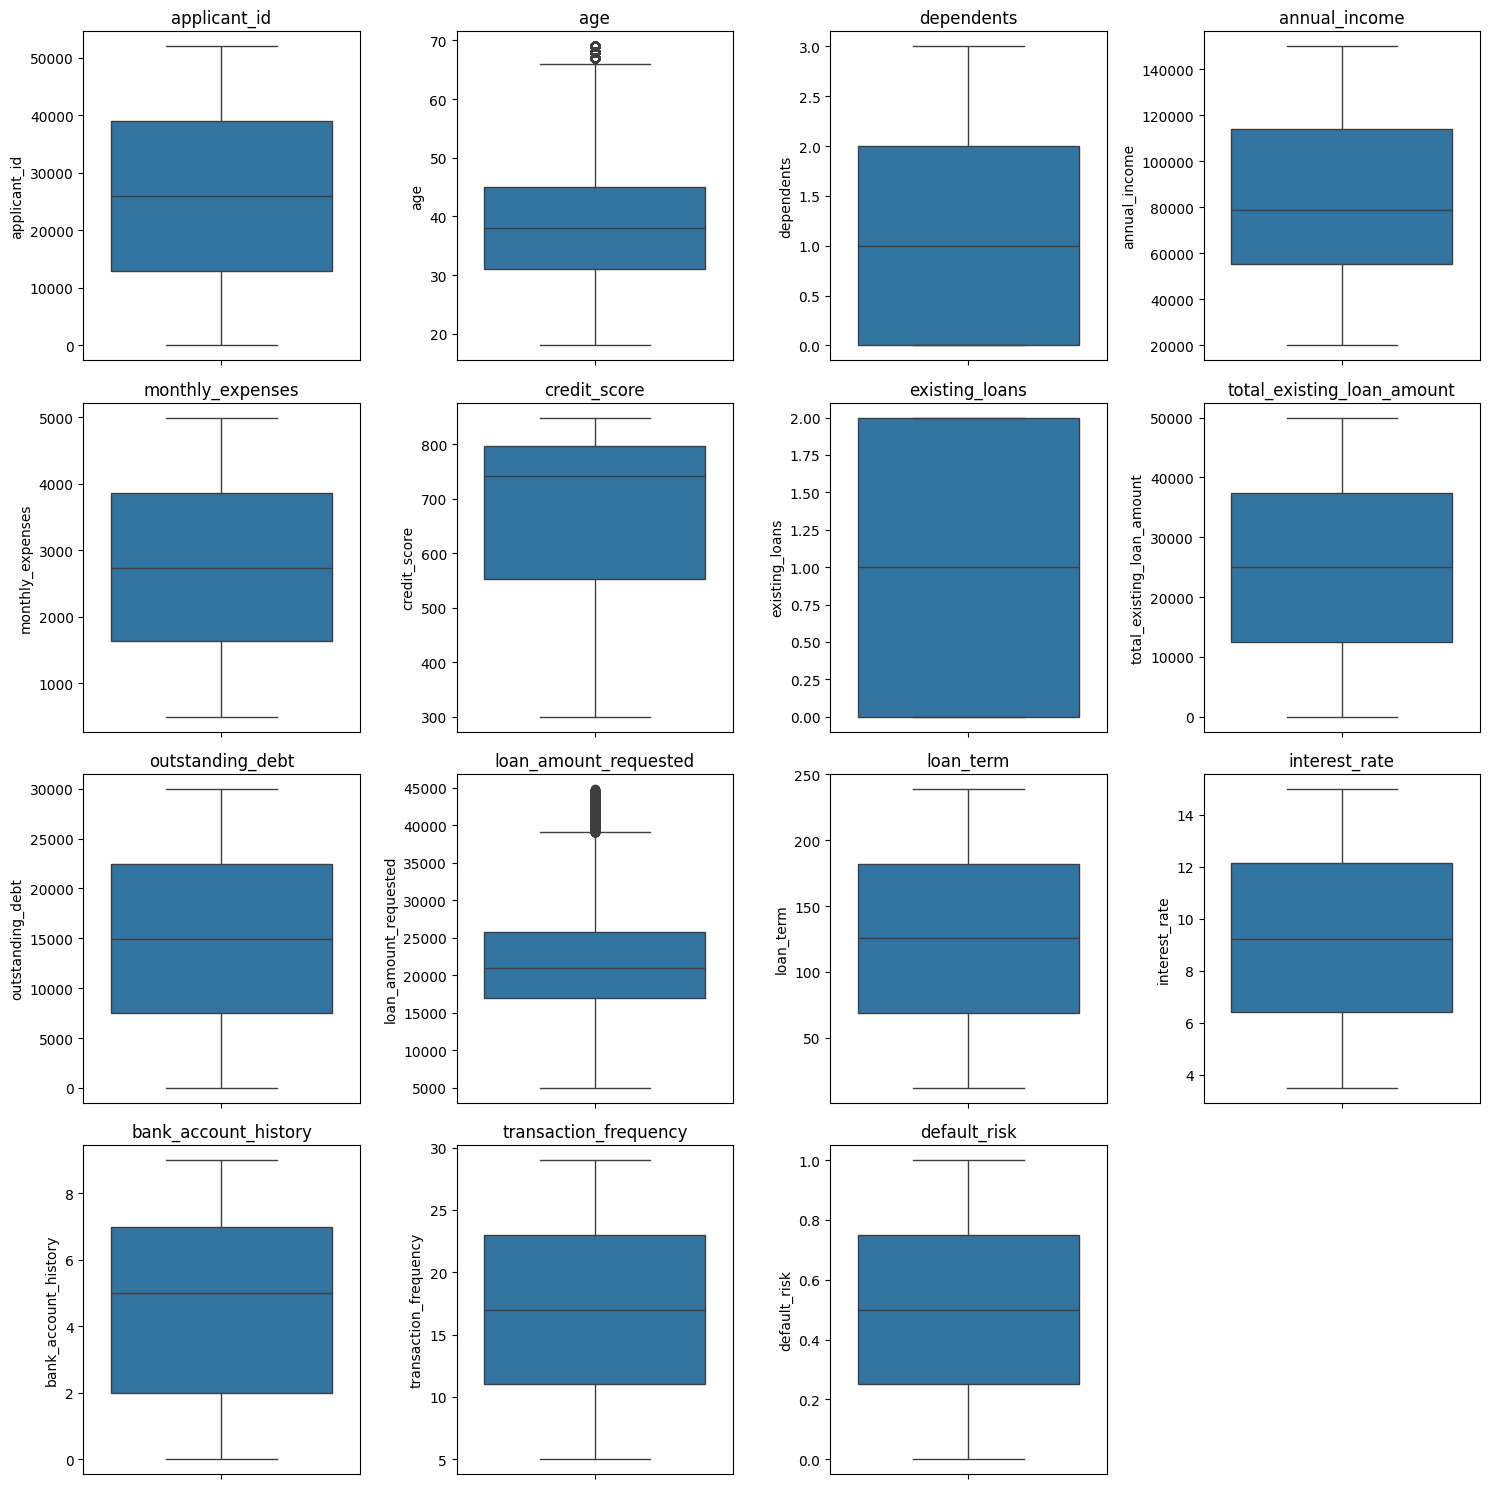

In [ ]:
# Handling outliers
# Define columns with numerical data to visualize and handle outliers
int_float_columns = ['applicant_id', 'age', 'dependents', 'annual_income',
       'monthly_expenses', 'credit_score', 'existing_loans',
       'total_existing_loan_amount', 'outstanding_debt',
       'loan_amount_requested', 'loan_term', 'interest_rate',
       'bank_account_history', 'transaction_frequency', 'default_risk']

# Plot boxplots for each feature to identify outliers
plt.figure(figsize=(15, 15))  # Set the figure size for the plots
for i, column in enumerate(int_float_columns, 1):
    plt.subplot(4, 4, i)  # Create a grid of subplots (4x4 grid here)
    sns.boxplot(data=df[column])  # Plot a boxplot for the current column
    plt.title(column)  # Set the title of the subplot

plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [8]:
# Examine the 'interest_rate' column
df['interest_rate'].describe()

count    52000.000000
mean         9.253494
std          3.318356
min          3.500000
25%          6.400000
50%          9.240000
75%         12.140000
max         15.000000
Name: interest_rate, dtype: float64

In [12]:
# Handle outliers for selected features
# Features to process for outlier removal
features_to_check = ['loan_amount_requested', 'age']

for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)  # Calculate the 25th percentile (Q1)
    Q3 = df[feature].quantile(0.75)  # Calculate the 75th percentile (Q3)
    IQR = Q3 - Q1  # Calculate the interquartile range (IQR)

    # Calculate the upper boundary for outlier detection
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows with values outside the upper boundary
    df = df[df[feature] <= upper_bound]

# Verify the shape of the dataset after outlier removal
print(df.shape)

(49719, 27)


I analyzed numerical features to detect outliers. Using boxplots, I found significant outliers in the Age and Loan_Amount_Requested features. The outliers appeared on the upper end of the data distribution.

I applied the Interquartile Range (IQR) method to handle these outliers, focusing on the upper range.

* For Age, values exceeding the upper limit calculated using IQR were removed.
* For Loan_Amount_Requested, values above the upper threshold determined by IQR were excluded.



## Analyzing Categorical Features

I examined categorical and object-type features to assess the distribution and uniqueness of their values.

In [ ]:
# Analyze categorical features
# Identify columns with categorical data
cate_features = df.select_dtypes(include=['object']).columns

# Display value counts for each categorical feature
for col in cate_features:
    print('#' * 50)  # Print a separator for clarity
    print(df[col].value_counts())  # Print the counts of unique values

##################################################
gender
Female    24878
Male      24841
Name: count, dtype: int64
##################################################
marital_status
Married     24805
Single      19884
Divorced     5030
Name: count, dtype: int64
##################################################
education
Graduate        19902
High School     19873
Postgraduate     9944
Name: count, dtype: int64
##################################################
employment_status
Employed         24752
Self-Employed    15057
Unemployed        9910
Name: count, dtype: int64
##################################################
occupation_type
Professional    12617
Salaried        12453
Freelancer      12367
Business        12282
Name: count, dtype: int64
##################################################
residential_status
Own      29825
Rent     14882
Other     5012
Name: count, dtype: int64
##################################################
city/town
Urban       29836
Suburban    14906
Ru

## Checking for Duplicate Rows

I inspected the dataset for duplicate rows. If duplicates were found, I planned to either remove them or handle them with an appropriate process.

In [ ]:
# Check for duplicated rows in the dataset
df.duplicated().sum()

0

In [15]:
# Save the cleaned dataset to a new CSV file
df.to_csv('loan_cleaned.csv', index=False)  # Do not include the index in the output file